# Three classic encripted messages with increasing security



## 1 - A monoalpgabetical cipher

The first one "msg1" is the result of applying a simple mono-alphabetic transformation.

Statistics for the occurence of each character in textes of this kind (potuguese) are given by the dictionary PTstats

### Before executing *anything* you need to obtain a file named "work??.py" and rename it as "data.py".

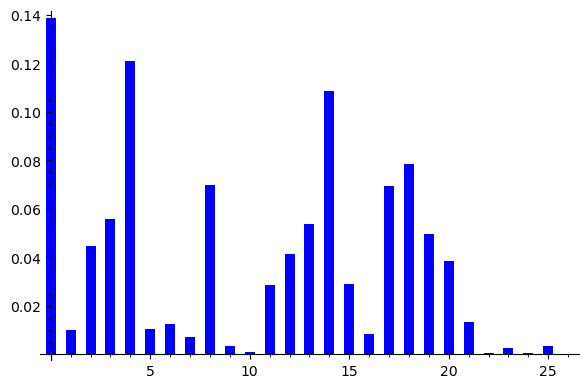

 dicionario de frequencia em portugues :  {'a': 0.138583183016512, 'e': 0.120706257804912, 'o': 0.108550992091023, 's': 0.0782698765089496, 'i': 0.0698455668100458, 'r': 0.069451089218815, 'd': 0.0558000555015957, 'n': 0.0538477868738726, 't': 0.0495047870126266, 'c': 0.0447716109338143, 'm': 0.0414230609130012, 'u': 0.0385138060219231, 'p': 0.0291236298043569, 'l': 0.0286513112251977, 'v': 0.0133593728319689, 'g': 0.0126298043568753, 'f': 0.010520743721382, 'b': 0.00992854169557375, 'q': 0.00836325794366588, 'h': 0.00713098376578327, 'j': 0.00352573886499237, 'z': 0.0032743166366033, 'x': 0.00240197030664632, 'k': 0.000818787290134591, 'y': 0.000539614263910087, 'w': 0.000463854585819342} 


tamanho 26
 dicionario com margin de erro :  {'f': 'a', 'a': 'lp', 'h': 'oe', 'k': 'ri', 'm': 'si', 'q': 'eo', 'd': 'isr', 'g': 'pul', 'i': 'dnt', 'j': 'ump', 'o': 'ctm', 't': 'mcu', 'u': 'ndt', 'p': 'tdnc', 'c': 'vgfbqhjz', 'e': 'gvfbqhjzx', 'n': 'wbqhjzxky', 'r': 'wbqhjzxky', 'y': 'wbqhjzxky', '

In [9]:
import string
from data import *
dic_list = []
#######################################################################################################
def aux_tranform_dictionary(dictionary,index,char):
    if(char!='_'):
        for c in range(0,len(list(dictionary.keys()))):
            if index != c :
                nnew = ""
                for x in dictionary[ list(dictionary.keys())[c]]:
                    if(x!=char):
                        nnew = nnew+x
                dictionary[ list(dictionary.keys())[c]] = nnew
    return dictionary
                    
def transform_dictionary(dictionary, index):
        if(index==26):
            dic_list.append(dictionary)
        else:
            current_letter = (list(dictionary.keys())[index])
            if(len(dictionary[current_letter]) > 1):
                for c in dictionary[current_letter]:
                    n_dictionary = dictionary.copy()
                    n_dictionary[current_letter] = c
                    n_dictionary = aux_tranform_dictionary(n_dictionary,index,c)
                    transform_dictionary(n_dictionary,index + 1)
            else:
                dictionary = aux_tranform_dictionary(dictionary,index,dictionary[current_letter])
                transform_dictionary(dictionary,index + 1)
#######################################################################################################
display(bar_chart([Stats[c] for c in string.ascii_lowercase]))
#######################################################################################################
frequency_number_list = [0] * 26
for n in msg1:
    frequency_number_list[n-1] = frequency_number_list[n-1] + 1
frequency_number_list_sorted  = frequency_number_list.copy()
frequency_number_list_sorted.sort(reverse=True)
#######################################################################################################
frequency_portugese = dict(sorted(Stats.items(), key=lambda item: item[1],reverse=True))
frequency_dictionary = dict(zip( list(string.ascii_lowercase) , frequency_number_list))
print(" dicionario de frequencia em portugues : " ,frequency_portugese,"\n\n")
#######################################################################################################

for n in range(0,len(frequency_number_list_sorted)):
    if(n<25):
        i = n 
        while(i< 25 and frequency_number_list_sorted[i] == frequency_number_list_sorted[i+1]):
            frequency_number_list_sorted[i] = frequency_number_list_sorted[i] + (0.0001 * i)
            i=i+1
dictionary_direct_translated = dict(zip( frequency_number_list_sorted, list(frequency_portugese.keys())))
print("tamanho",len(dictionary_direct_translated))


#######################################################################################################
error_margin_dictionary = {}
for x in frequency_dictionary.keys():
    current_frequency  = frequency_dictionary[x]
    error_margin_dictionary[x] = dictionary_direct_translated[current_frequency]
    for y in dictionary_direct_translated.keys():
        if(abs(current_frequency - y) < 10):
            if(dictionary_direct_translated[y] not in error_margin_dictionary[x]):
                error_margin_dictionary[x] = error_margin_dictionary[x] + dictionary_direct_translated[y]

error_margin_dictionary = (dict(sorted(error_margin_dictionary.items(), key=lambda item: len(item[1]))))
print(" dicionario com margin de erro : " ,error_margin_dictionary,"\n\n")

#######################################################################################################


hard_coded_dictionary =  {'f': 'a', 
                          'a': 'lp', 
                          'h': 'oe', 
                          'k': 'ri',
                          'm': 'si',
                          'q': 'eo', 
                          'd': 'isr',
                          'g': 'pul',
                          'i': 'dnt',
                          'j': 'ump',
                          'o': 'ctm', 
                          't': 'mcu', 
                          'u': 'ndt',
                          'p': '_', 
                          'c': '_',
                          'e': '_', 
                          'n': '_',
                          'r': '_', 
                          'y': '_', 
                          'l': '_',
                          'z': '_', 
                          'b': '_', 
                          's': '_',
                          'v': '_', 
                          'w': '_',
                          'x': '_'} 



transform_dictionary(hard_coded_dictionary,0)

ciphertext = ""
for c in msg1[ 0:len(msg1): 1]:
    ciphertext = ciphertext + list(string.ascii_lowercase)[c-1]
print("MSG :", ciphertext,"\n\n")  
for dic in dic_list:
    #print(dic)
    ciphertext_list= []
    ciphertext_list[:0]=ciphertext
    for i in range(0,len(ciphertext_list)):
        ciphertext_list[i] = dic[ciphertext_list[i]]
    print(''.join(ciphertext_list),"\n")    


The message was converted to a numerical code: 'a'->1, 'b'->2,...

### It should be quite easy to decript this message without almost any programming involved

## 2 - A simple Vigenère message

In the next message, "msg2", a simple Vigènere was used. The "msg2" was coded the same manner as "msg1". 

We suggest that you use the Friedman test to determine the period (the size of the key).

Friedman proved that, for  a class of cyphers that includes Vigenère, given two (long) texts, $T$ and $T'$, of the same size ($|T|=|T'|$), and with the same coincidence index ($Ic(T)=Ic(T')$),  their correspondent cyphertexts $E(T)$ and $E(T')$ satisfy

$$K(T,T')=\sum_i \frac{\delta(E(T)_i,E(T')_i)}{|T|}\sim Ic(T),$$
where

$$\delta(a,b)=\begin{cases}1& \text{if }a=b,\\
             0& \text{otherwise,}
        \end{cases}$$
$T_i$ denotes the $i$th letter of $T$, and $Ic(T)$ the coincidence index of $T$. 


Thus, if $P^j(T)$ denotes the $j$th circular permutation of $T$, and $C$ is criptogram resulting from applying a periodic cypher of period $p$, the succesion $(K(C,P^i(C))_i$ should have local maximums that differ by exactly $p$. 

Knowing the period, one can study the statistic of occurences of each $\{C_{pi+j}\mid i\in\mathbb{N}\}_{j<p}$ that should be similar to the original statistic of the source message, only affected by the circular permutation corresponging to the acting character of the key used. 

The carefull observation of the referred statistics an some "trial & error" should be enough to crack the criptogram.

## 3 - A more chalenging Vigenére

In "msg3" is the result of applying another Vigenère but the result was embedded in a finite field, and thus the order of the original alphabet was not preserved.  

### Caution!

Because of the relative small size of the criptograms, statistics may be deviant from the general statistics of the language. This means that you need to be careful with conclusions you may be led to infer from the cryptogram statistics.